<a href="https://colab.research.google.com/github/impratik7/NASA-Exoplanet-prediction/blob/master/Exoplanets_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Packages

In [ ]:
#!pip install pandas-profiling==3.2.0
!pip install MarkupSafe==2.0.1 
!pip install lazypredict
!pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 325 kB 9.4 MB/s 
     |████████████████████████████████| 102 kB 32.2 MB/s 
     |████████████████████████████████| 9.9 MB 20.3 MB/s 
     |████████████████████████████████| 679 kB 42.8 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 4.7 MB 55.9 MB/s 
     |████████████████████████████████| 296 kB 58.5 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=a3e627266354a4b34ed258ac3d90450e8eeed767cc9af2a569debbe9858183f8
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting 

In [ ]:
# Import packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, randint
import xgboost as xgb


# Sklearn Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, precision_score, confusion_matrix, accuracy_score

# Visualizes all the columns
from pandas_profiling import ProfileReport
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Project Objective:

In this project, our goal is to build a model that can predict the existence of an exoplanet (i.e. a planet that orbits a distant star system) given the light intensity readings from that star over time. The dataset we’ll be using comes from NASA’s Kepler telescope currently in space. This project will demonstrate how predictive classication modeling will helps to discover does planat is exoplanate or not.

## Data Extraction

Data extraction is the process of acquiring and processing raw data of various forms and types to improve the operational paradigms of an organization.

It is perhaps the most important operation of the Extract/Transform/Load (ETL) process because it is the foundation for critical analyses and  decision making processes. It enables consolidation, analysis and refining of data so that it can be converted into meaningful information that can be stored for further use and manipulation. The extracted data can help in decision making, customer base expansion, service improvements, predicting sales and optimizing costs, among other things.

In our use case, we are using NASA-Caltech API (https://exoplanetarchive.ipac.caltech.edu/docs/program_interfaces.html) to retrive the information captured by Kaper telescope. We transformed the JSON data from API to CSV using Excel to make it available for Machine Learning analysis.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/dataset/exoplanets_2018.csv')
df.head()

Mounted at /content/drive


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,616.0,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,875.0,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10800.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8080.0,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.0,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


## Exploratory Data Analysis

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, html={'style':{'full_width':True}})
#profile.to_notebook_iframe()
profile.to_file("/content/drive/My Drive/dataset/exoplanets_profile_report.html")

# from IPython.display import HTML, IFrame
# display(HTML("/content/drive/My Drive/CMPE-257/project/ML-Project-Files/your_report.html"))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Feature Engineering and Transformation 

Feature engineering is the process of transforming features, extracting features, and creating new variables from the original data, to train machine learning models.

Data in its original format can almost never be used straightaway to train classification or regression models. Instead, data scientists devote a huge chunk of their time to data preprocessing to train machine learning algorithms. Feature engineering is key to improving the performance of machine learning algorithms. Yet, it is very time-consuming. Fortunately, there are many Python libraries that we can use for data preparation. 

Some techniques above might work better with some algorithms or datasets, while some of them might be beneficial in all casses. Based on current situtation, There are couple of transformation takes place on data based followed as:
 
1. Change the columns name
2. Dropped some columns
3. Transformed target variables
4. Handling Missing values
5. Remove Duplicate instances


In [ ]:
# 1. Change the columns name
df = df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod.days',
'koi_period_err1':'OrbitalPeriodUpperUnc.days',
'koi_period_err2':'OrbitalPeriodLowerUnc.days',
'koi_time0bk':'TransitEpoch.BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc.BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc.BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration.hrs',
'koi_duration_err1':'TransitDurationUpperUnc.hrs',
'koi_duration_err2':'TransitDurationLowerUnc.hrs',
'koi_depth':'TransitDepth.ppm',
'koi_depth_err1':'TransitDepthUpperUnc.ppm',
'koi_depth_err2':'TransitDepthLowerUnc.ppm',
'koi_prad':'PlanetaryRadius.Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc.Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc.Earthradii',
'koi_teq':'EquilibriumTemperature.K',
'koi_teq_err1':'EquilibriumTemperatureUpperUnc.K',
'koi_teq_err2':'EquilibriumTemperatureLowerUnc.K',
'koi_insol':'InsolationFlux.Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc.Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc.Earthflux',
'koi_model_snr':'TransitSignal-to-Nois',
'koi_tce_plnt_num':'TCEPlanetNumbe',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperature.K',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc.K',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc.K',
'koi_slogg':'StellarSurfaceGravity.log10(cm/s**2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc.log10(cm/s**2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc.log10(cm/s**2)',
'koi_srad':'StellarRadius.Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc.Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc.Solarradii',
'ra':'RA.decimaldegrees',
'dec':'Decdecimaldegrees',
'koi_kepmag':'Kepler-band.mag'
})
df.head()

,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod.days,OrbitalPeriodUpperUnc.days,OrbitalPeriodLowerUnc.days,TransitEpoch.BKJD,TransitEpochUpperUnc.BKJD,TransitEpochLowerUnc.BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration.hrs,TransitDurationUpperUnc.hrs,TransitDurationLowerUnc.hrs,TransitDepth.ppm,TransitDepthUpperUnc.ppm,TransitDepthLowerUnc.ppm,PlanetaryRadius.Earthradii,PlanetaryRadiusUpperUnc.Earthradii,PlanetaryRadiusLowerUnc.Earthradii,EquilibriumTemperature.K,EquilibriumTemperatureUpperUnc.K,EquilibriumTemperatureLowerUnc.K,InsolationFlux.Earthflux,InsolationFluxUpperUnc.Earthflux,InsolationFluxLowerUnc.Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,TCEDeliver,StellarEffectiveTemperature.K,StellarEffectiveTemperatureUpperUnc.K,StellarEffectiveTemperatureLowerUnc.K,StellarSurfaceGravity.log10(cm/s**2),StellarSurfaceGravityUpperUnc.log10(cm/s**2),StellarSurfaceGravityLowerUnc.log10(cm/s**2),StellarRadius.Solarradii,StellarRadiusUpperUnc.Solarradii,StellarRadiusLowerUnc.Solarradii,RA.decimaldegrees,Decdecimaldegrees,Kepler-band.mag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,616.0,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,875.0,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10800.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8080.0,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.0,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [ ]:
#2. Transformed target variables
df['ExoplanetCandidate'] = df['DispositionUsingKeplerData'].apply(lambda x: 1 if x == 'CANDIDATE' else 0)
#df['ExoplanetConfirmed'] = df['ExoplanetArchiveDisposition'].apply(lambda x: 2 if x == 'CONFIRMED' else 1 if x == 'CANDIDATE' else 0 )


In [ ]:
#3. Dropped some columns
df.drop(columns=['KeplerName','KOIName','EquilibriumTemperatureUpperUnc.K',
                 'KepID','ExoplanetArchiveDisposition','DispositionUsingKeplerData',
                 'NotTransit-LikeFalsePositiveFlag','koi_fpflag_ss','CentroidOffsetFalsePositiveFlag',
                 'EphemerisMatchIndicatesContaminationFalsePositiveFlag','TCEDeliver',
                 'EquilibriumTemperatureLowerUnc.K'], inplace=True)

In [ ]:
#4. Handling Missing values
df.dropna(inplace=True)

In [ ]:
#5. Remove Duplicate instances
df.drop_duplicates(inplace=True)

# Sampling of Data for Training and Testing Models

Generally data used here is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

To keep thing ideal, We allocate 80% of total data to training and rest of 20% of data for testing.

![Train/Test Split](https://miro.medium.com/max/1400/1*-8_kogvwmL1H6ooN1A1tsQ.webp)


In [ ]:
features = df.drop(columns=['ExoplanetCandidate'])
target = df.ExoplanetCandidate
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1, test_size=.20)

## Training Benchmark and Hyper-parameter Tunning 

The best way to think about hyperparameters is like the settings of an algorithm that can be adjusted to optimize performance, just as we might turn the knobs of an AM radio to get a clear signal. When creating a machine learning model, we will be presented with design choices as to how to define your model architecture. Often, we don't immediately know what the optimal model architecture should be for a given model, and thus we would like to be able to explore a range of possibilities. In a true machine learning fashion, we will ideally ask the machine to perform this exploration and select the optimal model architecture automatically.

In [ ]:
# Creating Benchmark

from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:23<00:00,  1.22it/s]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.96,0.96,0.96,0.96,1.48
RandomForestClassifier,0.96,0.96,0.96,0.96,2.95
ExtraTreesClassifier,0.96,0.96,0.96,0.96,0.74
LGBMClassifier,0.96,0.96,0.96,0.96,1.02
LogisticRegression,0.96,0.96,0.96,0.96,0.20
BaggingClassifier,0.95,0.96,0.96,0.95,2.11
AdaBoostClassifier,0.95,0.95,0.95,0.95,1.41
CalibratedClassifierCV,0.95,0.95,0.95,0.95,2.43
LinearSVC,0.95,0.95,0.95,0.95,0.72


### Random searching of hyperparameters

Random search provide a discrete set of values to explore for each hyperparameter; rather providing a statistical distribution for each hyperparameter from which values may be randomly sampled.

Conceptually, we’ll define a sampling distribution for each hyperparameter. we can also define how many iterations we would like to build when searching for the optimal model. For each iteration, the hyperparameter values of the model will be set by sampling the defined distributions. One of the primary theoretical backings to motivate the use of a random search for most cases, hyperparameters are not equally important.

In [ ]:
# Hyper Parameter Tunning

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}


xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")

search_model = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=100, cv=3, verbose=1, n_jobs=-1, return_train_score=True)

search_model.fit(X_train, y_train)

best_model = search_model.best_estimator_


Fitting 3 folds for each of 100 candidates, totalling 300 fits


# Model Interpretation and Explainability

Explainability is the extent to which you can explain the internal mechanics of an ML or deep learning system in human terms. It is in contrast to the concept of the black box, in which even designers cannot explain why an AI arrives at a specific decision.

There are two types of explainability: global and local. Global explainability aims at making the overall ML model transparent and comprehensive, whereas local explainability focuses on explaining the model’s individual predictions.

The ability to explain an ML model and its predictions builds trust and improves ML adoption—the model is no longer a black box that makes predictions in a vacuum. This increases the comfort level of the consumers of model predictions. For model owners, the ability to understand the uncertainty inherent in ML models helps with debugging the model when things go wrong and improving the model for better business outcomes.

Feature importance is a technique that explains the features that make up the training data using a score (importance). It indicates how useful or valuable the feature is relative to other features. In the use case of individual 
`ExoplanetCandidate` prediction using XGBoost, the importance score indicates the value of each feature in the construction of the boosted decision trees within the model. The more a model uses an attribute to make key decisions with decision trees, the higher the attribute’s relative importance.



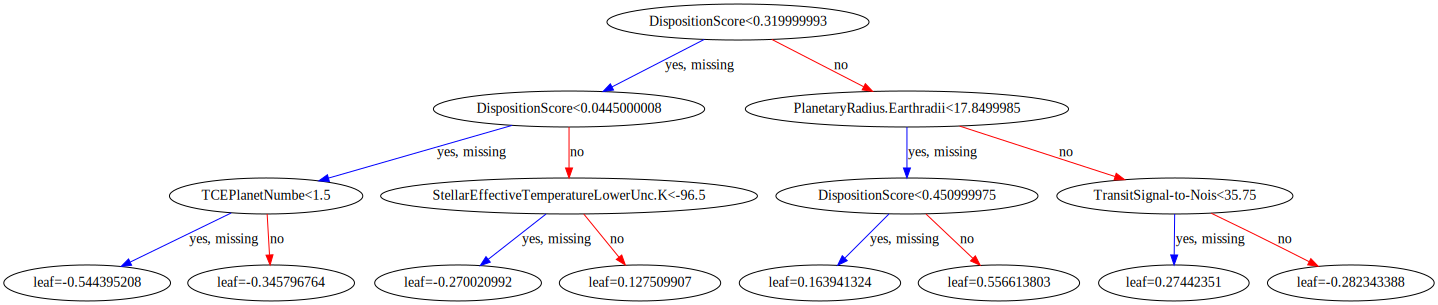

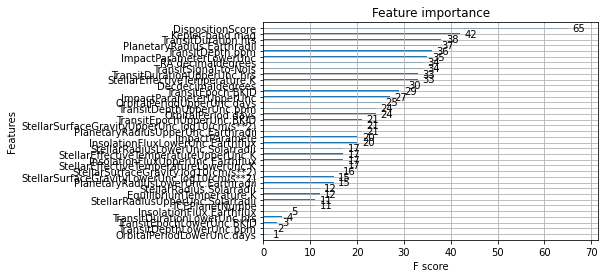

In [ ]:
# requires graphviz and python-graphviz conda packages
import graphviz

# plot importance of each feature figureout by model
xgb.plot_importance(best_model)

# plot the output tree via matplotlib, specifying the ordinal number of the target tree
# xgb.plot_tree(xgb_model, num_trees=xgb_model.best_iteration)

# converts the target tree to a graphviz instance
xgb.to_graphviz(best_model)

If we look at the feature importances returned by XGBoost we see that `DispositionScore` dominates the other features, clearly standing out as the most important predictor of `ExoplanetCandidate`.

# Model Evaluation

A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report as shown below. 

The report shows the main classification metrics precision, recall and f1-score on a per-class basis. The metrics are calculated by using true and false positives, true and false negatives. Positive and negative in this case are generic names for the predicted classes. There are four ways to check if the predictions are right or wrong:

1. TN / True Negative: when a case was negative and predicted negative
2. TP / True Positive: when a case was positive and predicted positive
3. FN / False Negative: when a case was positive but predicted negative
4. FP / False Positive: when a case was negative but predicted positive

### 1. Precision

Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives. Alternatively it is Accuracy of positive predictions.

Precision = TP/(TP + FP)

### 2. Recall 

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

Recall = TP/(TP+FN)

### 3. F1 score

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.


F1 Score = 2*(Recall * Precision) / (Recall + Precision)

### 4. Confusion Matrix
The confusion matrix is often used in machine learning to compute the accuracy of a classification algorithm.




In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred = best_model.predict(X_test)
target_names = ['NOT CANDIDATE','CANDIDATE']
print(classification_report(y_test, y_pred, target_names=target_names))


               precision    recall  f1-score   support

NOT CANDIDATE       0.95      0.97      0.96       750
    CANDIDATE       0.97      0.95      0.96       811

     accuracy                           0.96      1561
    macro avg       0.96      0.96      0.96      1561
 weighted avg       0.96      0.96      0.96      1561



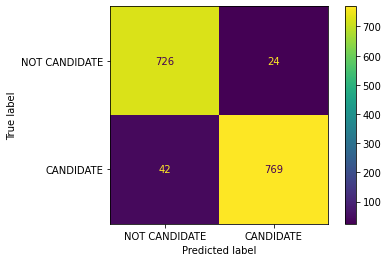

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()
